In [ ]:
# Comparaison between our R Model and sklearn's Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### Binomial Comparaison

In [13]:
df_credit_card = pd.read_csv('../data/credit_card.csv')
# One hot encoding
for col in df_credit_card.columns:
    if df_credit_card[col].dtype == 'object':
        df_credit_card = pd.concat([df_credit_card, pd.get_dummies(df_credit_card[col], prefix=col)], axis=1)
        df_credit_card.drop(col, axis=1, inplace=True)
# make a 70/30 train/test split
target = "Approved"
X = df_credit_card.drop(target, axis=1)
y = df_credit_card[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Same Standardisation (One hot encoding + StandardScaler)

scaler = StandardScaler()
# Scale numerical features
for col in X_train.columns:
    if X_train[col].dtype != 'uint8':
        X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1, 1))
        X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))


# Check for one hot encoding


In [ ]:
# Learning rate of 0.1 and 1000 iterations
model = LogisticRegression(C=0.1, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


Accuracy:  0.8309178743961353


[[99 18]
 [17 73]]


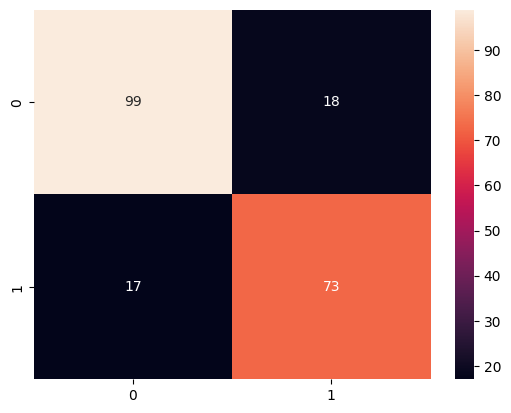

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.80      0.81      0.81        90

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207

F1 weighted:  0.831022114911766


In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()
# F1 score + loss
print(classification_report(y_test, y_pred))
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("F1 weighted: ", f1_weighted)
